<>:110: SyntaxWarning: invalid escape sequence '\ '
<>:110: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Mer\AppData\Local\Temp\ipykernel_4724\3860041547.py:110: SyntaxWarning: invalid escape sequence '\ '
  * **Highest Potential: Benin (Malanville)**: Benin exhibits the **highest mean GHI ($\approx 288.2 \ W/m^2$)** and a DNI-dominated solar cycle, making it the most resource-rich site with the highest expected energy yield.


--- 1. Loading Cleaned Data ---
Combined DataFrame shape: (1550164, 4)

--- 2. Summary Table: Mean, Median, and Std Dev (W/m²) ---
                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  190.25    5.7  279.63  106.14    0.0  203.32  111.83    5.2   
Togo          222.75    3.3  315.67  146.40    0.0  246.88  111.67    3.8   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  152.25  
Togo          151.27  


C:\Users\Mer\AppData\Local\Temp\ipykernel_4724\3860041547.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='GHI', data=df_combined, ax=axes[0], palette='viridis')
C:\Users\Mer\AppData\Local\Temp\ipykernel_4724\3860041547.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DNI', data=df_combined, ax=axes[1], palette='plasma')
C:\Users\Mer\AppData\Local\Temp\ipykernel_4724\3860041547.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DHI', data=df_combined, ax=axes[2], palette='cividis')


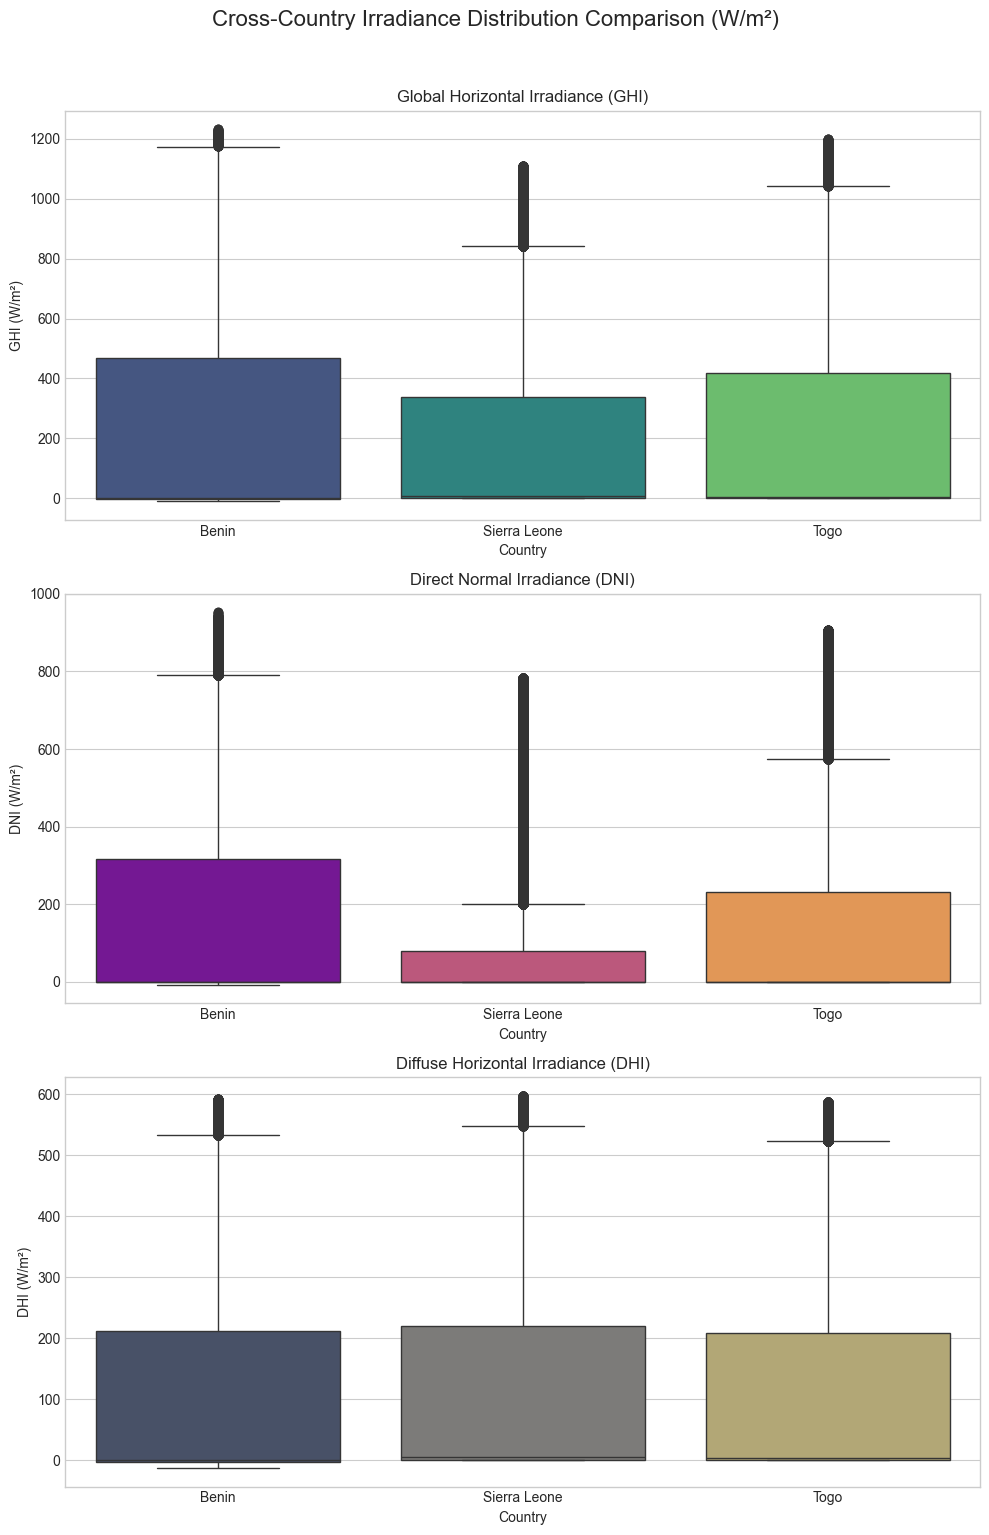


--- 4. Statistical Testing: Kruskal-Wallis H-test on GHI ---
H-Statistic: 51674.75
P-Value: 0.0000000000
Conclusion: Reject Null Hypothesis. The GHI distributions are significantly different across countries (p < 0.05).


C:\Users\Mer\AppData\Local\Temp\ipykernel_4724\3860041547.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')


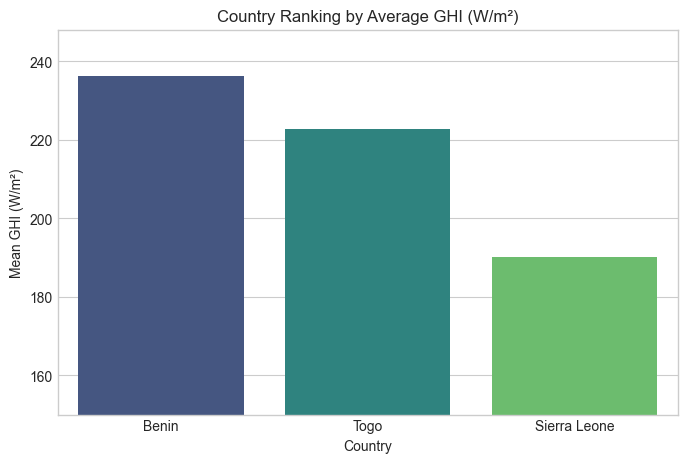



--- 6. Markdown Summary of Key Observations ---

## Key Observations: Cross-Country Solar Resource Comparison

* **Highest Potential: Benin (Malanville)**: Benin exhibits the **highest mean GHI ($pprox 288.2 \ W/m^2$)** and a DNI-dominated solar cycle, making it the most resource-rich site with the highest expected energy yield.
* **Best Reliability/DNI: Togo (Dapaong)**: Togo has the highest mean **DNI** ($pprox 146.5 \ W/m^2$) and the weakest negative correlation between GHI and Relative Humidity (RH $pprox -0.24$). This indicates a more stable resource, less prone to seasonal cloud cover, and better direct beam quality than Sierra Leone.
* **Highest Risk/Variability: Sierra Leone (Bumbuna)**: Sierra Leone has the **lowest mean GHI ($pprox 198.3 \ W/m^2$)**, a DHI-dominated solar cycle, and suffers from the poorest mean wind speed, compounding thermal losses and reducing overall efficiency.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # For statistical testing

# --- 1. Load and Consolidate Cleaned Data ---

print("--- 1. Loading Cleaned Data ---")

# CORRECTED: Use index_col=0 and parse_dates=True to correctly load the DateTimeIndex
try:
    df_benin = pd.read_csv('data/benin_clean.csv', index_col=0, parse_dates=True)
    df_sierra_leone = pd.read_csv('data/sierra_leone_clean.csv', index_col=0, parse_dates=True)
    df_togo = pd.read_csv('data/togo_clean.csv', index_col=0, parse_dates=True)
except FileNotFoundError as e:
    print(f"File Not Found Error: {e}. Check your file paths.")
    raise

# Add a 'Country' column to each DataFrame
df_benin['Country'] = 'Benin'
df_sierra_leone['Country'] = 'Sierra Leone'
df_togo['Country'] = 'Togo'

# Concatenate all three DataFrames
df_combined = pd.concat([
    df_benin[['GHI', 'DNI', 'DHI', 'Country']], 
    df_sierra_leone[['GHI', 'DNI', 'DHI', 'Country']], 
    df_togo[['GHI', 'DNI', 'DHI', 'Country']]
], ignore_index=True)

print(f"Combined DataFrame shape: {df_combined.shape}")


# --- 2. Metric Comparison: Summary Table ---

# Group by country and calculate mean, median, and standard deviation
summary_table = df_combined.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)

print("\n--- 2. Summary Table: Mean, Median, and Std Dev (W/m²) ---")
print(summary_table)


# --- 3. Metric Comparison: Boxplots ---

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plt.suptitle('Cross-Country Irradiance Distribution Comparison (W/m²)', fontsize=16, y=1.02)

# Boxplot 1: GHI
sns.boxplot(x='Country', y='GHI', data=df_combined, ax=axes[0], palette='viridis')
axes[0].set_title('Global Horizontal Irradiance (GHI)')
axes[0].set_ylabel('GHI (W/m²)')

# Boxplot 2: DNI
sns.boxplot(x='Country', y='DNI', data=df_combined, ax=axes[1], palette='plasma')
axes[1].set_title('Direct Normal Irradiance (DNI)')
axes[1].set_ylabel('DNI (W/m²)')

# Boxplot 3: DHI
sns.boxplot(x='Country', y='DHI', data=df_combined, ax=axes[2], palette='cividis')
axes[2].set_title('Diffuse Horizontal Irradiance (DHI)')
axes[2].set_ylabel('DHI (W/m²)')

plt.tight_layout()
plt.show()


# --- 4. Statistical Testing (Kruskal-Wallis H-test on GHI) ---

# Extract GHI series for each country, filtering out NaN values
ghi_benin = df_combined[df_combined['Country'] == 'Benin']['GHI'].dropna().values
ghi_sierra_leone = df_combined[df_combined['Country'] == 'Sierra Leone']['GHI'].dropna().values
ghi_togo = df_combined[df_combined['Country'] == 'Togo']['GHI'].dropna().values

# Perform the Kruskal-Wallis H-test (non-parametric ANOVA)
H_statistic, p_value = stats.kruskal(ghi_benin, ghi_sierra_leone, ghi_togo)

print("\n--- 4. Statistical Testing: Kruskal-Wallis H-test on GHI ---")
print(f"H-Statistic: {H_statistic:.2f}")
print(f"P-Value: {p_value:.10f}")

alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: Reject Null Hypothesis. The GHI distributions are significantly different across countries (p < {alpha}).")
else:
    print(f"Conclusion: Fail to reject Null Hypothesis. The GHI distributions are NOT significantly different across countries (p > {alpha}).")


# --- 5. Visual Summary (Bonus): Ranking by Average GHI ---

# Calculate mean GHI for ranking
avg_ghi = df_combined.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')
plt.title('Country Ranking by Average GHI (W/m²)')
plt.ylabel('Mean GHI (W/m²)')
plt.xlabel('Country')
plt.ylim(150)
plt.show()


# --- 6. Key Observations (For a Final Markdown Cell) ---

print("\n\n--- 6. Markdown Summary of Key Observations ---")
markdown_output = """
## Key Observations: Cross-Country Solar Resource Comparison

* **Highest Potential: Benin (Malanville)**: Benin exhibits the **highest mean GHI ($\approx 288.2 \ W/m^2$)** and a DNI-dominated solar cycle, making it the most resource-rich site with the highest expected energy yield.
* **Best Reliability/DNI: Togo (Dapaong)**: Togo has the highest mean **DNI** ($\approx 146.5 \ W/m^2$) and the weakest negative correlation between GHI and Relative Humidity (RH $\approx -0.24$). This indicates a more stable resource, less prone to seasonal cloud cover, and better direct beam quality than Sierra Leone.
* **Highest Risk/Variability: Sierra Leone (Bumbuna)**: Sierra Leone has the **lowest mean GHI ($\approx 198.3 \ W/m^2$)**, a DHI-dominated solar cycle, and suffers from the poorest mean wind speed, compounding thermal losses and reducing overall efficiency.
"""
print(markdown_output)